In [1]:
from phosphorus import *
%config InteractiveShell.ast_node_interactivity='all'


             _    _                  _    _
            | |  | |                | |  | |
           _| |_ | |__   ___  ___  _| |_ | |__   ___  _ __ _   _  ____
          /     \| '_ \ / _ \/ __|/     \| '_ \ / _ \| '__| | | |/ ___)
         ( (| |) ) | | | (_) \__ ( (| |) ) | | | (_) | |  | |_| ( (__
          \_   _/|_| |_|\___/|___/\_   _/|_| |_|\___/|_|   \__,_|\__ \
            | |                     | |                            _) )
            |_|                     |_|                           (__/

        Welcome to the Phosphorus Meaning Engine v3
        Created by Ezra Keshet (EzraKeshet.com)




In [ ]:
class Meaning5b(Meaning):
  def rules(self, alpha, a): # pylint: disable=no-self-argument
    """Defines standard rules for combining the meanings of the
    children of a node alpha. Meant to be overridden if different rules are wanted."""

    value, rule = None, None
    m = self(a)
    match alpha:      
      # PM
      case (beta, gamma) if m[gamma].type == m[beta].type == Type.et:
        rule = 'PM'
        pm_f = Function('lambda f : lambda g: lambda x: f(x) and g(x)', Type.et_et_et)
        value = pm_f(m[beta])(m[gamma])

      # FA
      case (beta, gamma) if  m[gamma] in m[beta].domain() :
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if  m[gamma] in m[beta].domain() :
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      
      # TN
      case str():
        rule = 'TN'
        value = m.lookup(alpha)

    return value, rule

m = Meaning5a({
  'snores' : 'lambda x: SNORES(x)'.et,
})

m('A'.e)['he', 'snores']

In [3]:
class Meaning5a(Meaning):
  def rules(self, alpha, a): # pylint: disable=no-self-argument
    """Defines standard rules for combining the meanings of the
    children of a node alpha. Meant to be overridden if different rules are wanted."""

    value, rule = None, None
    m = self(a)
    match alpha:      
      # PM
      case (beta, gamma) if m[gamma].type == m[beta].type == Type.et:
        rule = 'PM'
        pm_f = Function('lambda f : lambda g: lambda x: f(x) and g(x)', Type.et_et_et)
        value = pm_f(m[beta])(m[gamma])

      # FA
      case (beta, gamma) if  m[gamma] in m[beta].domain() :
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if  m[gamma] in m[beta].domain() :
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      case 't'|'he'|'she'|'it':
        rule = 'TP'
        value = a
      
      # TN
      case str():
        rule = 'TN'
        value = m.lookup(alpha)

    return value, rule

m = Meaning5a({
  'snores' : 'lambda x: SNORES(x)'.et,
})

m('A'.e)['he', 'snores']

Interpreting ('he', 'snores') with parameters: ('A',)
   Interpreting he with parameters: ('A',)
   => he = 'A' 	(TP)
   Interpreting snores with parameters: ('A',)
   => snores = λx . SNORES(x) 	(TN)
=> ('he', 'snores') = SNORES('A') 	(AF)


SNORES('A')

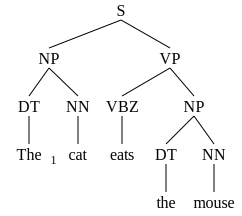

'The_1'

In [ ]:
import svgling
from nltk import Tree

tree = Tree.fromstring('(S (NP (DT The_1) (NN cat)) (VP (VBZ eats) (NP (DT the) (NN mouse))))')

def split_leaf(node):
  if isinstance(node, str):
    l = node.split('_')
    if len(l) > 1:
      return svgling.core.subscript_node(l[0], l[1]), ()
    return node, ()

def _repr_svg_(self):
  return svgling.draw_tree(self, tree_split=split_leaf)._repr_svg_()

Tree._repr_svg_ = _repr_svg_
tree
tree[0][0][0]


In [ ]:
from string import ascii_uppercase
DOMAIN = [SemVal.create(c,Type.e) for c in ascii_uppercase]
A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z = DOMAIN

def charset(f, domain = None):
  #logger.warning(f'CHARSET of {repr(f)}')
  if domain is None:
    domain = DOMAIN
  out = {c for c in domain if f(c)}
  #logger.warning(f'CHARSET of {f} is {out}')
  return out

def iota(f, domain = None):
  #logger.warning(f'IOTA of {f}')
  return max(charset(f,domain))

Interpreting ('black', 'pawn') with parameters: ()
   Interpreting black with parameters: ()
   => black = λx . BLACK(x) 	(TN)
   Interpreting pawn with parameters: ()
   => pawn = λx . PAWN(x) 	(TN)
=> ('black', 'pawn') = λx . BLACK(x) and PAWN(x) 	(PM)


{'B', 'D', 'E', 'F'}

Interpreting ('leftmost.et', 'pawn') with parameters: ()
   Interpreting leftmost.et with parameters: ()
   => leftmost.et = λx . len(charset(lambda y: LEFT_OF(y, x))) == 0 	(TN)
   Interpreting pawn with parameters: ()
   => pawn = λx . PAWN(x) 	(TN)
=> ('leftmost.et', 'pawn') = λx . len(charset(lambda y: LEFT_OF(y, x))) == 0 and PAWN(x) 	(PM)


{'A'}

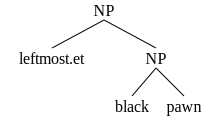

Interpreting (NP leftmost.et (NP black pawn)) with parameters: ()
   Interpreting leftmost.et with parameters: ()
   => leftmost.et = λx . len(charset(lambda y: LEFT_OF(y, x))) == 0 	(TN)
   Interpreting (NP black pawn) with parameters: ()
      Interpreting black with parameters: ()
      => black = λx . BLACK(x) 	(TN)
      Interpreting pawn with parameters: ()
      => pawn = λx . PAWN(x) 	(TN)
   => (NP black pawn) = λx . BLACK(x) and PAWN(x) 	(PM)
=> (NP leftmost.et (NP black pawn)) = λx . len(charset(lambda y: LEFT_OF(y, x))) == 0 and (BLACK(x) and PAWN(x)) 	(PM)


set()

Interpreting ('leftmost.et_et', 'pawn') with parameters: ()
   Interpreting leftmost.et_et with parameters: ()
   => leftmost.et_et = λf . λx . len(charset(lambda y: f(y) and LEFT_OF(y, x))) == 0 	(TN)
   Interpreting pawn with parameters: ()
   => pawn = λx . PAWN(x) 	(TN)
=> ('leftmost.et_et', 'pawn') = λx . len(charset(lambda y: PAWN(y) and LEFT_OF(y, x))) == 0 	(FA)


{'A',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z'}

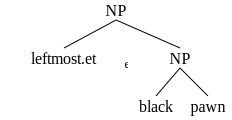

Interpreting (NP leftmost.et_et (NP black pawn)) with parameters: ()
   Interpreting leftmost.et_et with parameters: ()
   => leftmost.et_et = λf . λx . len(charset(lambda y: f(y) and LEFT_OF(y, x))) == 0 	(TN)
   Interpreting (NP black pawn) with parameters: ()
      Interpreting black with parameters: ()
      => black = λx . BLACK(x) 	(TN)
      Interpreting pawn with parameters: ()
      => pawn = λx . PAWN(x) 	(TN)
   => (NP black pawn) = λx . BLACK(x) and PAWN(x) 	(PM)
=> (NP leftmost.et_et (NP black pawn)) = λx . len(charset(lambda y: (BLACK(y) and PAWN(y)) and LEFT_OF(y, x))) == 0 	(FA)


{'A',
 'B',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z'}

In [ ]:
from IPython.display import HTML
from nltk import Tree
# Domain and Predicates / Relations
A, B, C, D, E, F, G = DOMAIN[:7]
PAWN = Predicate({
    (A,), (B,), (C,), (D,), (E,), (F,), (G,)
})
LEFT_OF = Predicate({
    (A,B), (A,C), (A,D), (A,E), (A,F), (A,G),
    (B,C), (B,D), (B,E), (B,F), (B,G),
    (C,D), (C,E), (C,F), (C,G),
    (D,E), (D,F), (D,G),
    (E,F), (E,G),
    (F,G)            
})
BLACK = Predicate({
    (B,), (D,), (E,), (F,)
})


# Lexical entries
m3 = Meaning({
    'leftmost.et'  : 'lambda x : len(charset(lambda y : LEFT_OF(y,x)))==0'.et,
    'pawn'      : 'lambda x : PAWN(x)'.et,
    'the'       : 'lambda f : (len(charset(f))==1, iota(f))'.et_e,
    'black'     : 'lambda x : BLACK(x)'.et
})
    

# CHANGE ONLY BELOW
m3.update({
    'leftmost.et_et' : 'lambda f : lambda x: len(charset(lambda y : f(y) and LEFT_OF(y,x)))==0'.et_et
})
# CHANGE ONLY ABOVE

HTML("<h3>[black pawn]</h3>")
charset(m3['black','pawn'])

HTML("<h3>[leftmost.et pawn]</h3>")
charset(m3['leftmost.et','pawn'])

tree3 = Tree.fromstring('(NP leftmost.et (NP black pawn))')
HTML('<h3>[leftmost.et black pawn]</h3>')
tree3
charset(m3[tree3])

HTML("<h3>[leftmost.et_et pawn]</h3>")
charset(m3['leftmost.et_et','pawn'])

tree3 = Tree.fromstring('(NP leftmost.et_et (NP black pawn))')
HTML('<h3>[leftmost.et_et black pawn]</h3>')
tree3
charset(m3[tree3])

In [ ]:
from nltk import ImmutableTree
tt = ImmutableTree.fromstring('(NP leftmost.et_et (NP black pawn))')
type([tt]) == list


True

In [ ]:
console_handler.setLevel(logging.INFO)
the = 'lambda f: iota(f) if len(charset(f)) == 1 else None'.et_e
dog = 'lambda x: x in DOMAIN[:1]'.et
charset(dog)
the(dog)

{'A'}

'A'

In [ ]:
#DOMAIN = DOMAIN[:3]
#DOMAIN
KILLED = Predicate({(A,B),})
BLACK = Predicate({(B,), (C,)})
CAT = Predicate({(B,)})
ESCAPED = Predicate({(A,)})

del KILLED
del BLACK
del CAT
del ESCAPED

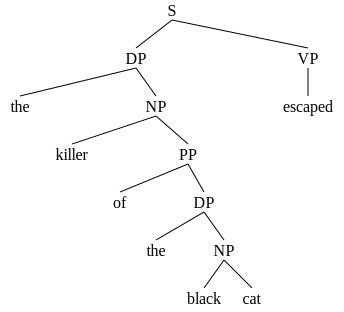

Interpreting (S (DP the (NP killer (PP of (DP the (NP black cat))))) (VP escaped)) with parameters: ()
   Interpreting (DP the (NP killer (PP of (DP the (NP black cat))))) with parameters: ()
      Interpreting the with parameters: ()
      => the = λf . iota(f) if len(charset(f)) == 1 else None 	(TN)
      Interpreting (NP killer (PP of (DP the (NP black cat)))) with parameters: ()
         Interpreting killer with parameters: ()
         => killer = λy . λx . KILLED(x, y) 	(TN)
         Interpreting (PP of (DP the (NP black cat))) with parameters: ()
            Interpreting of with parameters: ()
            => of = None 	(TN)
            Interpreting (DP the (NP black cat)) with parameters: ()
               Interpreting (NP black cat) with parameters: ()
                  Interpreting black with parameters: ()
                  => black = λx . BLACK(x) 	(TN)
                  Interpreting cat with parameters: ()
                  => cat = λx . CAT(x) 	(TN)
               => (NP bl

ESCAPED(iota(lambda x: KILLED(x, iota(lambda x: BLACK(x) and CAT(x)) if len(charset(lambda x: BLACK(x) and CAT(x))) == 1 else None)) if len(charset(lambda x: KILLED(x, iota(lambda x: BLACK(x) and CAT(x)) if len(charset(lambda x: BLACK(x) and CAT(x))) == 1 else None))) == 1 else None)

In [ ]:
m= Meaning()
m.update({
  'killer'  : 'lambda y: lambda x :KILLED(x,y)'.eet,
  'black'   : 'lambda x: BLACK(x)'.et,
  'cat'     : 'lambda x: CAT(x)'.et,
  'escaped' : 'lambda x: ESCAPED(x)'.et,
  'the'     : 'lambda f: ( len(charset(f))==1, iota(f) )'.et_e
})

from nltk import Tree
tree = Tree.fromstring("""
(S  (DP the
        (NP killer
            (PP of
                (DP the
                    (NP black cat)
                )
            )
        )
    )
    (VP escaped)
)
""")

test = tree[0][1][1][1]
test = tree
test

m[test]




In [ ]:
m.memo

{('the',
  ()): Function("lambda f: iota(f) if len(charset(f)) == 1 else None", Type((('e', 't'), 'e'))),
 ('killer',
  ()): Function("lambda y: lambda x: KILLED(x, y)", Type(('e', ('e', 't')))),
 ('of', ()): None,
 ('black', ()): Function("lambda x: BLACK(x)", Type(('e', 't'))),
 ('cat', ()): Function("lambda x: CAT(x)", Type(('e', 't'))),
 (ImmutableTree('NP', ['black', 'cat']),
  ()): Function("lambda x: BLACK(x) and CAT(x)", Type(('e', 't'))),
 (ImmutableTree('DP', ['the', ImmutableTree('NP', ['black', 'cat'])]),
  ()): iota(lambda x: BLACK(x) and CAT(x)) if len(charset(lambda x: BLACK(x) and CAT(x))) == 1 else None,
 (ImmutableTree('PP', ['of', ImmutableTree('DP', ['the', ImmutableTree('NP', ['black', 'cat'])])]),
  ()): iota(lambda x: BLACK(x) and CAT(x)) if len(charset(lambda x: BLACK(x) and CAT(x))) == 1 else None,
 (ImmutableTree('NP', ['killer', ImmutableTree('PP', ['of', ImmutableTree('DP', ['the', ImmutableTree('NP', ['black', 'cat'])])])]),
  ()): Function("lambda x: KILLE

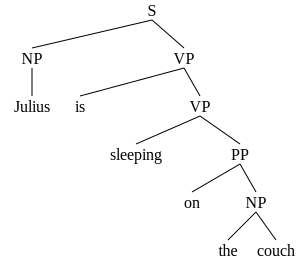

In [ ]:
from nltk import Tree
tree = Tree.fromstring("""
(S
  (NP Julius)
  (VP is
      (VP sleeping
          (PP on (NP the couch))
      )
  )
)""")
tree

m = Meaning({
    'Julius'    : 'J'.e,
    'the'       : 'lambda f: iota(f)'.et_e,

})

#m[tree]

In [ ]:
#!pip install nltk
from nltk import Tree
#!pip install svgling

In [ ]:
node = parse('PAWN("A")', mode='eval')
obj = compile(node, '<string>', 'eval')
eval(obj)

1

In [ ]:
m = Meaning({
    'Joe'     : 'J'.e,
    'Kaline'  : 'K'.e,
    'cat'     : 'lambda x: CAT(x)'.et,
    'gray'    : 'lambda f : lambda x: f(x) and GRAY(x)'.et_et,
})

m['Joe', 'cat']

Interpreting ('Joe', 'cat') with parameters: ()
   Interpreting Joe with parameters: ()
   => Joe = 'J' 	(TN)
   Interpreting cat with parameters: ()
   => cat = λx . CAT(x) 	(TN)
=> ('Joe', 'cat') = CAT('J') 	(AF)


CAT('J')

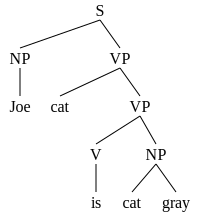

Interpreting (S (NP Joe) (VP cat (VP (V is) (NP cat gray)))) with parameters: ()
   Interpreting (NP Joe) with parameters: ()
      Interpreting Joe with parameters: ()
      => Joe = 'J' 	(TN)
   => (NP Joe) = 'J' 	(NN)
   Interpreting (VP cat (VP (V is) (NP cat gray))) with parameters: ()
      Interpreting cat with parameters: ()
      => cat = λx . CAT(x) 	(TN)
      Interpreting (VP (V is) (NP cat gray)) with parameters: ()
         Interpreting (V is) with parameters: ()
            Interpreting is with parameters: ()
            => is = None 	(TN)
            Removing vacuous items: ['is']
            No non-vacuous children in node (V )
         => (V ) = None 	(NN)
         Interpreting (NP cat gray) with parameters: ()
            Interpreting gray with parameters: ()
            => gray = λf . λx . f(x) and GRAY(x) 	(TN)
         => (NP cat gray) = λx . CAT(x) and GRAY(x) 	(AF)
         Removing vacuous items: [Tree('V', ['is'])]
      => (VP (NP cat gray)) = λx . CAT(x) and

CAT('J') and (CAT('J') and GRAY('J'))

In [ ]:
t = Tree.fromstring('(S (NP Joe) (VP cat (VP (V is) (NP cat gray))))')
t

m[t]

In [ ]:
m.update({
  'gray'    : 'lambda f : lambda x: f(x) and GRAY(x)'.eet_t,
  })

m['gray']
m[t]

Interpreting gray with parameters: ()
=> gray = λf . λx . f(x) and GRAY(x) 	(TN)


Function("lambda f: lambda x: f(x) and GRAY(x)", Type(('e', (('e', 't'), 't'))))

Interpreting (S (NP Joe) (VP cat (VP (V is) (NP cat gray)))) with parameters: ()
   Interpreting (NP Joe) with parameters: ()
      Interpreting Joe with parameters: ()
      => Joe = 'J' 	(TN)
   => (NP Joe) = 'J' 	(NN)
   Interpreting (VP cat (VP (V is) (NP cat gray))) with parameters: ()
      Interpreting cat with parameters: ()
      => cat = λx . CAT(x) 	(TN)
      Interpreting (VP (V is) (NP cat gray)) with parameters: ()
         Interpreting (V is) with parameters: ()
            Interpreting is with parameters: ()
            => is = None 	(TN)
            Removing vacuous items: ['is']
            No non-vacuous children in node (V )
         => (V ) = None 	(NN)
         Interpreting (NP cat gray) with parameters: ()
            Interpreting gray with parameters: ()
            => gray = λf . λx . f(x) and GRAY(x) 	(TN)
!!! Error interpreting node (NP cat gray):
 No rule found to combine cat and gray
!!! Error interpreting node (VP (V is) (NP cat gray)):
 No rule found to c

ValueError: No rule found to combine cat and gray

In [ ]:
class Meaning4(Meaning):
  def rules(m, alpha):
    match alpha:      # Note: m.quiet(  ) turns off printing
      # PM
      case (beta, gamma) if m.quiet(  m[gamma].type == m[beta].type == Type.et ):
        rule = 'PM'
        value = 'lambda f : lambda g: lambda x: f(x) and g(x)'.et_et_et(m[beta])(m[gamma])

      # FA
      case (beta, gamma) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      # TN
      case str():
        rule = 'TN'
        value = m.lookup(alpha)

      case _:
        rule = '??'
        value = alpha

    return value, rule

m4 = Meaning4({
    'Joe'     : 'J'.e,
    'Kaline'  : 'K'.e,
    'Texas'   : 'T'.e,
    'in'      : 'lambda x: lambda y: IN(y,x)'.eet,
    'cat'     : 'lambda x: CAT(x)'.et,
    'gray'    : 'lambda x: GRAY(x)'.et,
})

m4['gray', 'cat']
m4['Kaline', [['gray', 'cat'], ['in', 'Texas']]]

Interpreting ('gray', 'cat') with parameters: ()
   Interpreting gray with parameters: ()
   => gray = λx . GRAY(x) 	(TN)
   Interpreting cat with parameters: ()
   => cat = λx . CAT(x) 	(TN)
=> ('gray', 'cat') = λx . GRAY(x) and CAT(x) 	(PM)


Function("lambda x: GRAY(x) and CAT(x)", Type(('e', 't')))

Interpreting ('Kaline', (('gray', 'cat'), ('in', 'Texas'))) with parameters: ()
   Interpreting Kaline with parameters: ()
   => Kaline = 'K' 	(TN)
   Interpreting (('gray', 'cat'), ('in', 'Texas')) with parameters: ()
      Interpreting ('gray', 'cat') with parameters: ()
         Interpreting gray with parameters: ()
         => gray = λx . GRAY(x) 	(TN)
         Interpreting cat with parameters: ()
         => cat = λx . CAT(x) 	(TN)
      => ('gray', 'cat') = λx . GRAY(x) and CAT(x) 	(PM)
      Interpreting ('in', 'Texas') with parameters: ()
         Interpreting in with parameters: ()
         => in = λx . λy . IN(y, x) 	(TN)
         Interpreting Texas with parameters: ()
         => Texas = 'T' 	(TN)
      => ('in', 'Texas') = λy . IN(y, 'T') 	(FA)
   => (('gray', 'cat'), ('in', 'Texas')) = λx . (GRAY(x) and CAT(x)) and IN(x, 'T') 	(PM)
=> ('Kaline', (('gray', 'cat'), ('in', 'Texas'))) = (GRAY('K') and CAT('K')) and IN('K', 'T') 	(AF)


(GRAY('K') and CAT('K')) and IN('K', 'T')

In [ ]:
class Meaning3(Meaning):
  def rules(m, alpha):
    match alpha:      # Note: m.quiet(  ) turns off printing
      # FA
      case (beta, gamma) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      # TN
      case str():
        rule = 'TN'
        value = m.lookup(alpha)

      case _:
        rule = '??'
        value = alpha

    return value, rule

m3 = Meaning3({
    'Joe'     : 'J'.e,
    'Kaline'  : 'K'.e,
    'cat'     : 'lambda x: CAT(x)'.et,
    'gray'    : 'lambda f: lambda x: f(x) and GRAY(x)'.et_et,
    'fond'    : ...
})

#m3['Joe']
#m3['Kaline']
#m3['cat']
#m3['Kaline', 'cat']
m3[('a',)]
m3['a', 'cat']
m3['is', ['a', 'cat']]
m3['Kaline', [['fond', 'Joe'], ['gray', 'cat']]]
m3['Kaline', 'gray']

Interpreting ('a',)
   Interpreting a
   => a = None 	(TN)
   Removing vacuous items: ['a']
   No non-vacuous children in node ()
=> () = None 	(NN)
Interpreting ('a', 'cat')
   Interpreting a
   => a = None 	(TN)
   Interpreting cat
   => cat = λx . CAT(x) 	(TN)
   Removing vacuous items: ['a']
=> ('cat',) = λx . CAT(x) 	(NN)


Function("lambda x: CAT(x)", Type(('e', 't')))

Interpreting ('is', ['a', 'cat'])
   Interpreting is
   => is = None 	(TN)
   Interpreting ('a', 'cat')
      Interpreting a
      => a = None 	(TN)
      Interpreting cat
      => cat = λx . CAT(x) 	(TN)
      Removing vacuous items: ['a']
   => ('cat',) = λx . CAT(x) 	(NN)
   Removing vacuous items: ['is']
=> (('a', 'cat'),) = λx . CAT(x) 	(NN)


Function("lambda x: CAT(x)", Type(('e', 't')))

Interpreting ('Kaline', [['fond', 'Joe'], ['gray', 'cat']])
   Interpreting Kaline
   => Kaline = 'K' 	(TN)
   Interpreting (('fond', 'Joe'), ('gray', 'cat'))
      Interpreting ('fond', 'Joe')
         Interpreting fond
         => fond = Ellipsis 	(TN)
         Interpreting Joe
         => Joe = 'J' 	(TN)
!!! Error interpreting node ('fond', 'Joe'):
 'ellipsis' object has no attribute 'domain'
!!! Error interpreting node [['fond', 'Joe'], ['gray', 'cat']]:
 'ellipsis' object has no attribute 'domain'
!!! Error interpreting node ['Kaline', [['fond', 'Joe'], ['gray', 'cat']]]:
 'ellipsis' object has no attribute 'domain'


AttributeError: 'ellipsis' object has no attribute 'domain'

In [ ]:
m3.update({'is': 'lambda f: lambda x: f(lambda y:1)(x)'.et_et__et})

m3['gray']
m3['is', 'gray']

In [ ]:
tree = Tree.fromstring('(S (NP (N Kaline)) (VP is (NP (Det a) (N cat))))')
tree
m3[tree]

In [ ]:
class Meaning3(Meaning):
  def rules(m, alpha):
    match alpha:      # Note: m.quiet(  ) turns off printing
      # FA
      case (beta, gamma) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      # TN
      case str():# if alpha in m:
        rule = 'TN'
        value = m.lookup(alpha)

      case _:
        rule = '??'
        value = alpha
    return value, rule

m = Meaning3({
    'Ann'     : 'A'.e,
    'smokes'  : 'lambda x: SMOKES(x)'.et,
    'tall'    : 'lambda x: TALL(x)'.et,
    'likes'   : 'lambda x: lambda y: LIKES(x,y)'.eet,
#    'is'      : None,
})

m['Ann']
m['smokes']
m['Ann', 'smokes']
m['smokes', 'Ann']

In [ ]:
m['tall', 'is']

In [ ]:
t = [1,2]
t = t - [1]

In [ ]:
'lambda f:lambda x: f(x) and GRAY(x)'.et

In [ ]:
'(lambda x: lambda y: lambda z: INTRODUCED(z,x,y))(S)'.eet

a. [λx.[λy.[λz.z introduced x to y]]](Ann)(Sue)

b. [λx.[λy.[λz.z introduced x to y](Ann)](Sue)]

c. [λx.[λy.[λz.z introduced x to y](Ann)]](Sue) 

d. [λx.[λy.[λz.z introduced x to y]](Ann)](Sue)

e. [λf.[λx.f(x)=1 and x is gray]]([λy.y is a cat])

f. [λg.[λx.g(x)(Ann)=1]]([λy.[λz.z saw y]])

g. [λm.[λn.n>3 and n<7](m)] 

h. [λm.[λn.[λo.o>3 and o<7](n)](m)] 

In [ ]:
'lambda g: (lambda x:g(x)(Ann))'.eet_et('lambda y:lambda z:SAW(z,y)'.eet)

'lambda m: lambda n:n>3 and m<7'.eet('3'.e)

In [ ]:
catf = 'lambda y:CAT(y)'.et

ff = 'lambda f: lambda x: f(x) and GRAY(x)'.et_et
ff(catf)

gg = 'lambda f: f(A)'.eet_et
gg
gg('lambda x:lambda y:FOO(x,y)'.eet)

In [ ]:
Function('lambda y: CAT(y)', Type(('e', 't')))('x') and GRAY('x')

In [ ]:
import ast
ast.dump(ast.parse('x smokes', mode= 'eval'))